# Hubble Ultra Deep Field Displays

## Importing Libraries

In [1]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

rcParams['figure.figsize'] = [10. , 8.]

## Importing Ultra Deep Field Image Data

In [2]:
data = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = data.byteswap(inplace=True).newbyteorder()

## Plotting Image

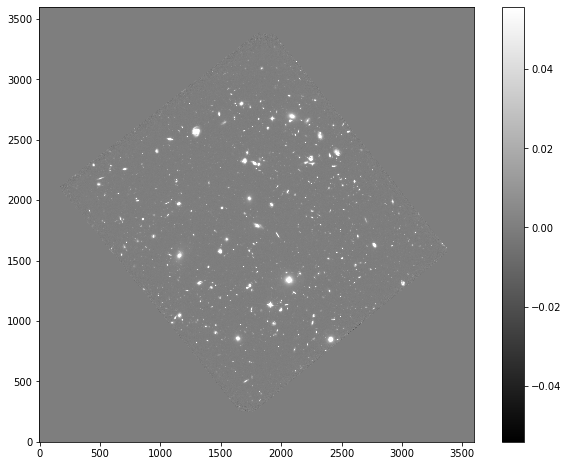

In [3]:
m , s = np.mean(data) , np.std(data) #setting the mean and standard deviation of sources
plt.imshow(data, interpolation='nearest', cmap='gray' , vmin=m-s, vmax=m+s, origin='lower') #displaying the image
plt.colorbar() #generating a reference colorbar
plt.savefig('stars') #saving figure

## Finding Background Noise to Take Out of Signal Data

In [4]:
bkg = sep.Background(data)

In [5]:
print(bkg.globalback) #displaying background data's
print(bkg.globalrms)

0.0
0.0005398219218477607


In [6]:
bkg_image = bkg.back()

## Plotting the Background

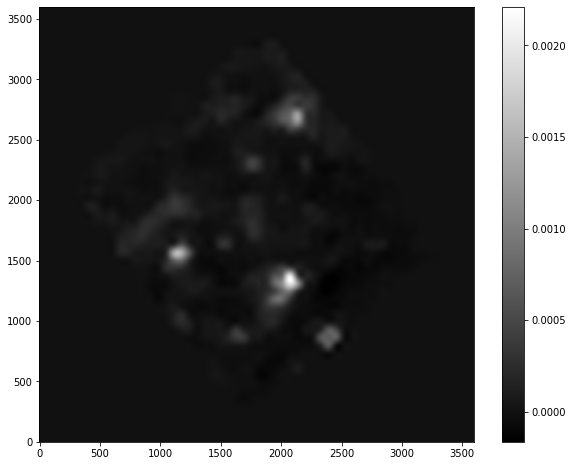

In [7]:
plt.imshow(bkg_image , interpolation='nearest', cmap='gray', origin='lower') #Displaying the background
plt.colorbar()
plt.savefig('bkg_image')

## Plotting the Background Noise

In [8]:
bkg_rms = bkg.rms()

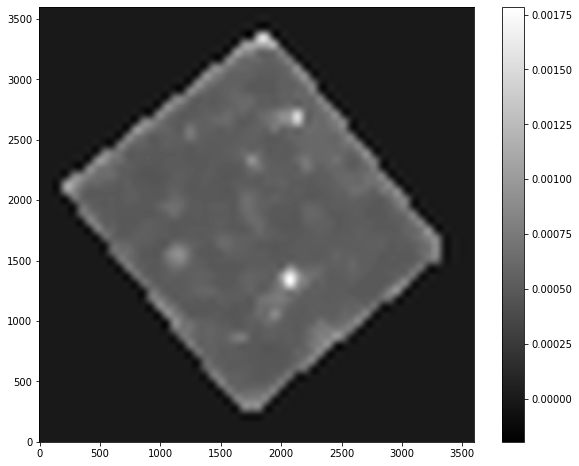

In [9]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin = 'lower')
plt.colorbar()
plt.savefig('bkg_noise')

## Obtaining Image Data with Background Reduced

In [10]:
data_sub = data - bkg #subtracting out background from image data

In [11]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms) #obtaining sources of objects in the image without noise

In [12]:
print('Individual Sources: ', len(objects))

Individual Sources:  8645


## Plotting Source Image

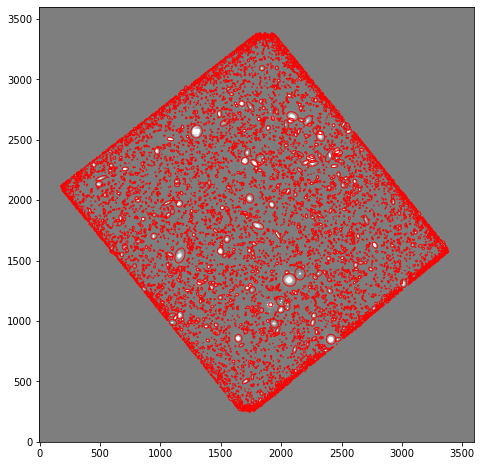

In [13]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots() #creating a sublplot
m , s = np.mean(data_sub) , np.std(data_sub) #getting mean and standard deviation values for reduced data
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower') #plotting the image

for i in range(len(objects)): #plotting circles around each source
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [14]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

Text(0.5, 1.0, 'Flux Graph')

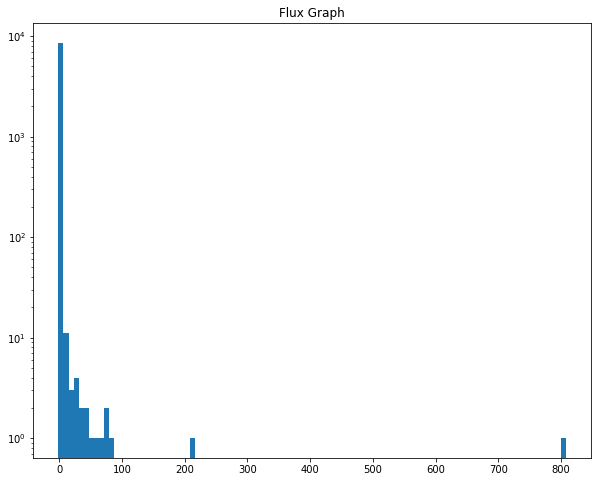

In [21]:
plt.hist(flux, bins=100)
plt.yscale('log')
plt.title('Flux Graph')

In [19]:
hdu = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdu.info()

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   
